## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
cont=df.query('group=="control"')
treat=df.query('group=="treatment"')

In [31]:
cont.query('landing_page=="new_page"').nunique()

user_id         1928
timestamp       1928
group              1
landing_page       1
converted          2
dtype: int64

In [32]:
treat.query('landing_page=="new_page"').nunique()

user_id         145310
timestamp       145311
group                1
landing_page         1
converted            2
dtype: int64

b. Use the cell below to find the number of rows in the dataset.

In [33]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [34]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [37]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [49]:
treat.groupby('landing_page').user_id.nunique()

landing_page
new_page    145310
old_page      1965
Name: user_id, dtype: int64

In [53]:
df.shape[0]-df.nunique()[0]

3894

In [5]:
treat.groupby('landing_page').nunique()

,user_id,timestamp,group,landing_page,converted
landing_page,,,,,
new_page,145310,145311,1,1,2
old_page,1965,1965,1,1,2


f. Do any of the rows have missing values?

In [43]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [22]:
df.shape

(294478, 5)

In [30]:
treat.count()

user_id         147276
timestamp       147276
group           147276
landing_page    147276
converted       147276
dtype: int64

In [7]:
deletedlist1=treat.query('landing_page=="old_page"').index.tolist()
deletedlist2=cont.query('landing_page=="new_page"').index.tolist()

In [8]:
df2=df.drop(deletedlist1)
df2.drop(deletedlist2, inplace=True)

In [9]:
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

In [82]:
df2.user_id.count()

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2.user_id.value_counts()[:5]

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [84]:
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop([1899], inplace=True)

In [86]:
df2.user_id.nunique()

290584

In [14]:
df2.to_csv('df2.csv')

### LOAD ###

In [3]:
df2 = pd.read_csv('df2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    290585 non-null  int64 
 1   user_id       290585 non-null  int64 
 2   timestamp     290585 non-null  object
 3   group         290585 non-null  object
 4   landing_page  290585 non-null  object
 5   converted     290585 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [64]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [65]:
pold=df2.query('group=="control"').converted.mean()
pold

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [66]:
pnew=df2.query('group=="treatment"').converted.mean()
pnew

0.11880724790277405

d. What is the probability that an individual received the new page?

In [67]:
df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [68]:
obs_val=pnew-pold
obs_val

-0.0015790565976871451

It seems that the old page is better but untill now there is no sufficient evidence for that, to be sure that it is statistically significant I must do the following:

<font color='blue'>
1- simulating sampling distribution for the difference.

2- we use the standard deviation to simulate sample distribution under the null.

3- calculating p-value and compare it with alpha.

4- decide to reject the null hypothesis or not.</font>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

H0:  **$p_{new}$** - **$p_{old}$** <= 0

H1:  **$p_{new}$** - **$p_{old}$** > 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [69]:
#under the null hypothesis, p old= p new= p(conversion)
p_new=df2.converted.mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [70]:
p_old=df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [71]:
n_new=df2.query('group=="treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [72]:
n_old=df2.query('group=="control"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [73]:
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [74]:
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [75]:
new_page_converted.mean() - old_page_converted.mean()

-0.0006556394180294439

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

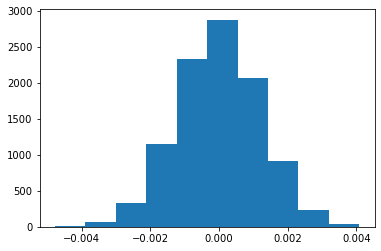

In [76]:
new_page_converted = np.random.binomial(n_new, p_new,10000) / n_new
old_page_converted = np.random.binomial(n_old, p_old,10000) / n_old
diffs = new_page_converted - old_page_converted
plt.hist(diffs);

In [77]:
p_diffs=np.array(diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9049

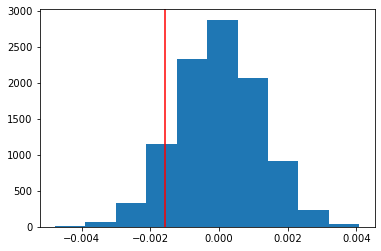

In [78]:
plt.hist(diffs);

plt.axvline(obs_val, color='red')
p_val=(p_diffs > obs_val).mean()
p_val

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font color='blue'>1- the null hypothesis is that conversion rate for old page is the same or larger than the new page, the alternative is the new is higher.

2- I simulated sampling distribution under the null hypothesis.

3- I plot the observed difference in the simulation.

4- I measured the  proportion of the p_diffs where it is greater than the actual difference observed, this value is called p-value, which indicates how likely this value (or larger) happens if the null is true.

5- since the p-value is larger than alpha (for type#1 error =0.05), we can`t reject the null hypothesis and  we dont have statistical evidence that the new page is better than the old one.</font>


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [79]:
convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [80]:
import statsmodels.api as sm
alternative=[convert_new>0]
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<font color='blue'>The p-value is the same as we computed before.
The z-score means that our observtion is located in 1.3 standard deviation below the mean.
z-score describes how much our statistic is above or below the average.
the z-test is less than the critical value (-1.6), the value is less than we need to reject null hypothesis.</font>



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color='blue'>logistic regresion</font>


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [4]:
df2['intercept'] = 1
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('a_page', axis=1)
df2.head()

,Unnamed: 0,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [5]:
import statsmodels.api as sm
log_mod = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:               8.085e-06
Time:                        22:20:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<font color='blue'>p value measures whether the variable is statistically significant in predecting conversion or not.
p value (0.19) indicates that this variable is not statistically significant. This is a two-sided t-test compared to a one-sided t-test in part II.
we dont have an evidence to reject null hypothesis, which is both pages are the same in this case.</font>



<font color='blue'>H0:  **$p_{new}$** - **$p_{old}$** = 0

H1:  **$p_{new}$** - **$p_{old}$** != 0</font>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color='blue'>From the last model result, I think it is better to add other variables and see if they enhance predicting the conversion. it is important if added other variables to see if relation of one depends on onother, then we need to make the interaction. Another problem may arise by considering other additional factors may be the multicollinearity, which happens when two or more variables have strong correlation with each other and having the same information about variance.,</font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [7]:
countries = pd.read_csv('countries.csv')

df3 = df2.set_index('user_id').join(countries.set_index('user_id'))
df3.head()

,Unnamed: 0,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,,
630000,63114,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,103873,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US
630002,205236,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US
630003,247344,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US
630004,242283,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US


In [85]:
df3.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [9]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])


In [10]:
df3.head()

,Unnamed: 0,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,
630000,63114,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1
630001,103873,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1
630002,205236,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1
630003,247344,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1
630004,242283,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1


In [11]:
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:               2.324e-05
Time:                        22:21:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
==============================================================================
"""

<font color='blue'>p-values for countries indicate also that they are not statistically significant for predicting the conversion.</font>



In [25]:
np.exp(-0.0408)

0.9600211149716509

<font color='blue'>Conversion is 0.960 times as likely on canadian page than the US page, holding other variables constant.</font>


In [26]:
np.exp(0.0099)

1.0099491671175422

<font color='blue'>Conversion is 1.00994 times as likely on UK new page than the US page, holding other variables constant.</font>


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [12]:
df3['CA_page']= df3.CA * df3.ab_page
df3['UK_page'] = df3.UK * df3.ab_page
df3.head(5)

,Unnamed: 0,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,
630000,63114,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1,0,0
630001,103873,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1,0,0
630002,205236,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1,0,0
630003,247344,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1,0,0
630004,242283,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1,0,0


In [14]:

logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','CA','UK','CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:               3.483e-05
Time:                        22:24:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.506      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

<font color='blue'>Now, the p value of CA page is statistically significant, it seems that the way the landing page related to conversion is different depending on the country, the interaction do reveals different value for coefficient.
we saw that each variable (landing page & country) did not show any statistic significant individually, but when we combine the two explaratory variables and make interaction, it becomes more obvious.</font>



In [3]:
np.exp(-0.0469)

0.95418281110072622

<font color='blue'>Conversion is 0.954 times as likely on canadian new page than the old page, holding other variables constant.

<font color='blue'>Conclusion:
    
    after A/B testing, we did not have statistic evidence to reject the null, and change the old page.
    we make logistic regresion to see which variable would be significant in predicting the conversion rate.
    we found that the landing page is not statistically significant.
    we tested another variable which is country, we also found that it is not significant.
    we made interaction between the two variables and found out that the country landing page useful for predicting the conversion.


<a id='conclusions'></a>
## Finishing Up


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0